# Team Members
 - 20200366, Amr Ibrahim Mohamed
 - 20200367, Amr Khaled Ahmed
 - 20200645, Youssef Galaleddin Nazem
 - 20200254, Sherif Ahmed Mohamed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load and Evaluate the Best Model on Testing Data

In [2]:
mnist_test_data = pd.read_csv("mnist_test.csv")
mnist_test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Load the best model
import keras

loaded_model = keras.models.load_model("best_model.keras")

In [4]:
# Extract labels and pixel values
X_test = mnist_test_data.iloc[:, 1:]
y_test = mnist_test_data["label"]

In [5]:
# Normalize and reshape images
X_test = X_test / 255.0
X_test = X_test.values.reshape(-1, 28, 28)

In [6]:
# Flatten images for K-NN 
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [12]:
# Use the best model on the testing data
import tensorflow as tf
from sklearn.model_selection import GridSearchCV


if isinstance(loaded_model, GridSearchCV):
    test_accuracy = loaded_model.score(X_test_flatten, y_test)
else:
    y_test_pred_probs = loaded_model.predict(
        X_test
    )  # contains the predicted probabilities for each class
    y_test_pred = tf.argmax(
        y_test_pred_probs, axis=1
    ).numpy()  # contains the corresponding predicted class labels for the test set images.
    test_accuracy = loaded_model.evaluate(X_test, y_test)[1]

print("\nTesting Accuracy (Best Model):", test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0883 - accuracy: 0.9767

Testing Accuracy (Best Model): 0.9767000079154968


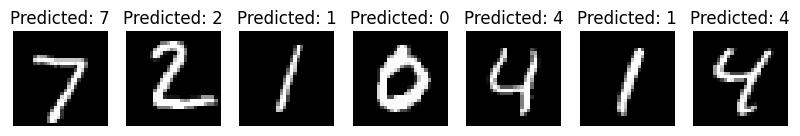

In [8]:
# Visualize a few test images along with their predicted labels 
# First 7 images

plt.figure(figsize=(10, 2))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Predicted: {y_test_pred[i]}")
    plt.axis("off")
plt.show()

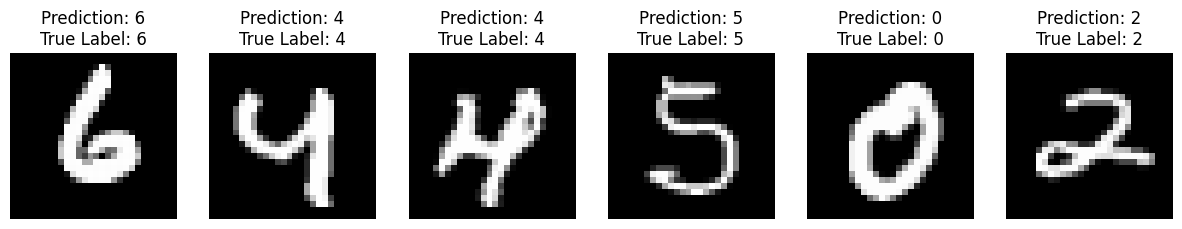

In [9]:
# Choose a random sample of test images to visualize
num_samples = 6
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Visualize the test images and predictions
plt.figure(figsize=(15, 3))
for i, index in enumerate(random_indices, 1):
    plt.subplot(1, num_samples, i)
    plt.imshow(X_test[index], cmap="gray")
    plt.title(f"Prediction: {y_test_pred[index]}\nTrue Label: {y_test.iloc[index]}")
    plt.axis("off")

plt.show()